# Assignment 5
Problem: MultiClass Classification in Supervised Learning

Dataset: Red Wine Quality Dataset

ML Model : Random Forest Classifier

Model Performance : 0.67

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
wine_data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

# Exploratory Data Analysis (Descriptive and Visual)

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

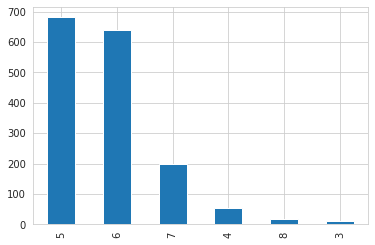

In [ ]:
wine_data.quality.value_counts().plot(kind='bar')

We have a lot of average quality wine than that of good or poor quality

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_data.shape

(1599, 12)

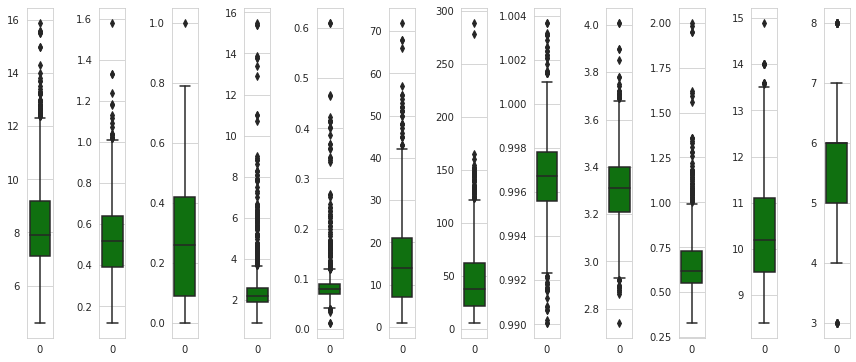

In [ ]:
l = wine_data.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data = wine_data[l[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [ ]:
new_wine_data = wine_data[~((wine_data < (Q1 - 1.5 * IQR)) |(wine_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("dimensions before outlier removal: ", wine_data.shape)
print("dimensions after outlier removal: ", new_wine_data.shape)
print("The number  of outliers removed: ", wine_data.shape[0] - new_wine_data.shape[0])

dimensions before outlier removal:  (1599, 12)
dimensions after outlier removal:  (1179, 12)
The number  of outliers removed:  420


#Data Split and Model Evaluation

In [ ]:
X = new_wine_data.drop('quality', axis=1)
y = new_wine_data.quality

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [ ]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_Xtest = norm_fit.transform(X_test)
# display values
print(new_Xtrain)

[[0.41666667 0.74576271 0.14492754 ... 0.56756757 0.24615385 0.17021277]
 [0.27777778 0.38418079 0.28985507 ... 0.58108108 0.47692308 0.36170213]
 [1.         0.42937853 0.71014493 ... 0.33783784 0.16923077 0.19148936]
 ...
 [0.15277778 0.58757062 0.13043478 ... 0.85135135 0.46153846 0.70212766]
 [0.22222222 0.58757062 0.33333333 ... 0.56756757 0.56923077 0.46808511]
 [0.20833333 0.49717514 0.20289855 ... 0.64864865 0.44615385 0.63829787]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier()
rfc.fit(new_Xtrain, y_train)

RandomForestClassifier()

In [ ]:
#precision score
rfc_score = rfc.score(new_Xtest, y_test)
print("score of the model : ", rfc_score)

score of the model :  0.7231638418079096


##The initial baseline model score  was : 0.6729166666666667

In [ ]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(new_Xtest)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[  0,   8,   4,   0],
       [  0, 125,  32,   0],
       [  0,  28, 114,   8],
       [  0,   3,  15,  17]])

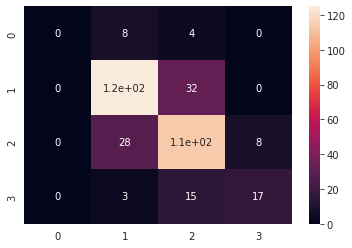

In [ ]:
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
print("The accuracy score: ", accuracy_score(y_test, y_pred))
print("The f1 score : ", f1_score(y_test, y_pred, average = "micro"))

The accuracy score:  0.7231638418079096
The f1 score :  0.7231638418079096


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(new_Xtrain, y_train)

LogisticRegression()

In [ ]:
model.score(new_Xtest, y_test)

0.632768361581921

Initially it was 0.55 (approx)

In this case, the model performance with Random Forest was better than Logistic Regression 

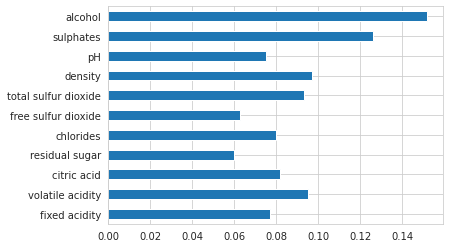

In [ ]:
#checking the feature importance
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(new_Xtrain, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(new_Xtest, y_test)

0.635593220338983

## Experimenting with Feature Selection 

In [ ]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(rfc) #using the model we used for Random Forest Classification 
selection.fit(new_Xtrain, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
selected_features= X_train.columns[(selection.get_support())]
len(selected_features)

5

In [ ]:
selected_features

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

In [ ]:
selection_X_train = selection.transform(new_Xtrain)
selection_X_test = selection.transform(new_Xtest)

In [ ]:
selection_model = RandomForestClassifier()
selection_model.fit(selection_X_train, y_train)

RandomForestClassifier()

In [ ]:
selection_model.score(selection_X_test, y_test)

0.672316384180791